**Example** 1 We need to enclose a rectangular field with a fence. We have 500 feet of fencing material and a building is on one side of the field and so won’t need any fencing. Determine the dimensions of the field that will enclose the largest area.
![替代文字](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image001.png)
In this problem we want to maximize the area of a field and we know that will use 500 ft of fencing material. So, the area will be the function we are trying to optimize and the amount of fencing is the constraint. The two equations for these are,
$$Maximize : A=xy$$
$$Constraint : 500 = x + 2y$$


In [1]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy
from sympy import*
from sympy import*

C:\Users\user\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


$$x = 500 − 2y$$
$$A(y) = ( 500 − 2y ) y = 500y − 2y^2 $$
$$A′(y) = 500 − 4y$$

In [2]:
def my_function(y):
    return 500*y-2*y**2

In [3]:
def my_function_x(y):
    x = 500-2*y
    return x

In [4]:
y = Symbol('y')     #定義X為未知數
solve(diff(my_function(y), y))    #對 500y - 2y^2微分,並解出理論解

[125]

In [5]:
y1 = 125
x1 = 500 - 2*y1
A = x1 * y1
print('x1 = ',x1,',y1 = ',y1,',A = ',A)

x1 =  250 ,y1 =  125 ,A =  31250


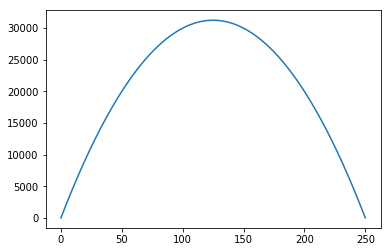

In [6]:
# 1.2 Create input data using NumPy.
x = np.arange(0.0,250.0,0.01)
y = my_function(x)
plt.plot(x,y)

<font size=6>Using Gradient Descent solve the problem</font><p>
<font size=3>梯度下降法（英語：Gradient descent)<p>是一個一階最佳化算法，通常也稱為最速下降法。 要使用梯度下降法找到一個函數的局部極小值，必須向函數上當前點對應梯度（或者是近似梯度）的反方向的規定步長距離點進行疊代搜索。如果相反地向梯度正方向疊代進行搜索，則會接近函數的局部極大值點；這個過程則被稱為梯度上升法。</font>

In [7]:
y = tf.Variable(tf.random_uniform([1], 0, 250))

loss = my_function(y)  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(-0.1)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [8]:
sess = tf.Session()
sess.run(init)
#y_initial_values = sess.run(x)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([y]))

[array([171.7141], dtype=float32)]


In [9]:
for step in range(201):
    sess.run(train)   
print(sess.run([y]))

[array([125.00001], dtype=float32)]


In [10]:
Y_GD = 125
X_GD = 500 - 2*Y_GD
A_GD = X_GD * Y_GD
print('x_GD = ',X_GD ,',y_GD = ', Y_GD , ', A_GD = ',A_GD)

x_GD =  250 ,y_GD =  125 , A_GD =  31250


<font size=6>Using Genetic Algorithm solve the problem</font><p>
<font size=3>遺傳演算法（英語：genetic algorithm (GA) ）<p>是計算數學中用於解決最佳化的搜尋演算法，是進化演算法的一種。進化演算法最初是借鑑了進化生物學中的一些現象而發展起來的，這些現象包括遺傳、突變、自然選擇以及雜交等。<p>

遺傳演算法通常實現方式為一種電腦類比。對於一個最佳化問題，一定數量的候選解（稱為個體）可抽象表示為染色體，使種群向更好的解進化。傳統上，解用二進位表示（即0和1的串），但也可以用其他表示方法。進化從完全隨機個體的種群開始，之後一代一代發生。在每一代中評價整個種群的適應度，從目前種群中隨機地選擇多個個體（基於它們的適應度），通過自然選擇和突變產生新的生命種群，該種群在演算法的下一次疊代中成為目前種群。</font>

In [11]:
#匯入套件
from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitMutation
from gaft.plugin_interfaces.analysis import OnTheFlyAnalysis
from gaft.analysis.fitness_store import FitnessStore

#定義範圍 0~250 因為x+2y=500 所以單邊長一介於0~250之間
indv_template = BinaryIndividual(ranges=[(0, 250)], eps=0.001)
population = Population(indv_template=indv_template, size=30).init()

#創建遺傳因子
selection = TournamentSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitMutation(pm=0.1)

#創建GA演算法
engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,
                  analysis=[FitnessStore])

#定義最佳化問題
@engine.fitness_register
def fitness(indv):
    y, = indv.solution
    return my_function(y)

#顯示最佳結果
@engine.analysis_register
class ConsoleOutputAnalysis(OnTheFlyAnalysis):
    def finalize(self, population, engine):
        best_indv = population.best_indv(engine.fitness)
        x = best_indv.solution
        y = engine.ori_fmax
        msg = 'Optimal solution: ({}, {})'.format(x, y)
        self.logger.info(msg)
#執行250次
if '__main__' == __name__:
    engine.run(ng=250)
    
#顯示x,y,z
from best_fit import *
Y_GA = int(best_fit[-1][1][0])
X_GA = my_function_x(Y_GA)
A_GA = my_function(Y_GA)
print('X_GA = ',X_GA,'\nY_GA = ',Y_GA,'\nA_GA = ',A_GA)

gaft.FitnessStore   INFO     Best fitness values are written to best_fit.py
gaft.ConsoleOutputAnalysis   INFO     Optimal solution: ([125.0], 31250.0)
X_GA =  250 
Y_GA =  125 
A_GA =  31250
